In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters

### Import data (Make sure to parse dates. Consider setting index column to 'date'.)

In [140]:
df = pd.read_csv('fcc-forum-pageviews.csv')

In [141]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [149]:
df = pd.read_csv(
    'fcc-forum-pageviews.csv',
    index_col=0,
    parse_dates=True
)


In [150]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [151]:
df.count() 

value    1304
dtype: int64

### Clean data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='value'>

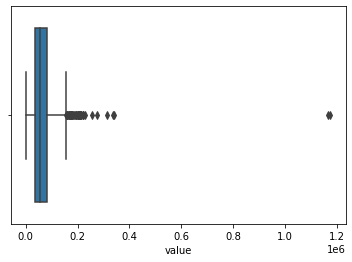

In [152]:
# Box Plot
sns.boxplot(df['value'])

In [153]:
Q1 = df.quantile (q = .025).astype(int)
Q3 = df.quantile (q = .975).astype(int)
Q3


value    177613
Name: 0.975, dtype: int32

In [154]:
df_filtrado = df[(df['value'] > Q1['value']) & (df['value'] < Q3['value'])]
df_filtrado.count() 

value    1238
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='value'>

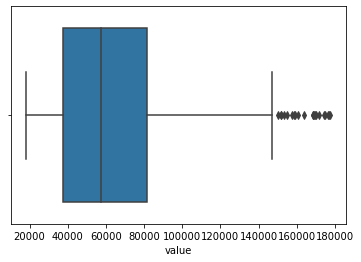

In [155]:
sns.boxplot(df_filtrado['value'])

### Draw line plot

<AxesSubplot:xlabel='date'>

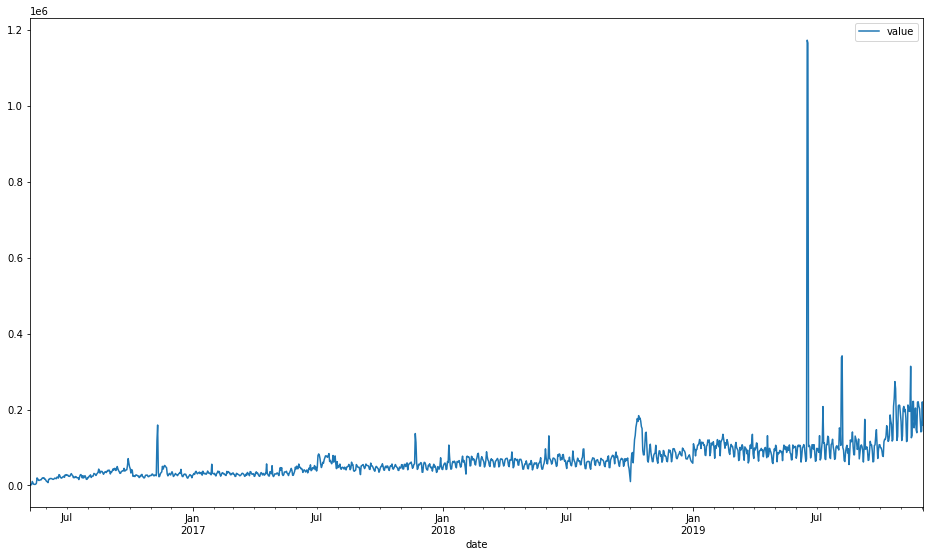

In [156]:
df.plot(figsize=(16, 9))

<AxesSubplot:xlabel='date'>

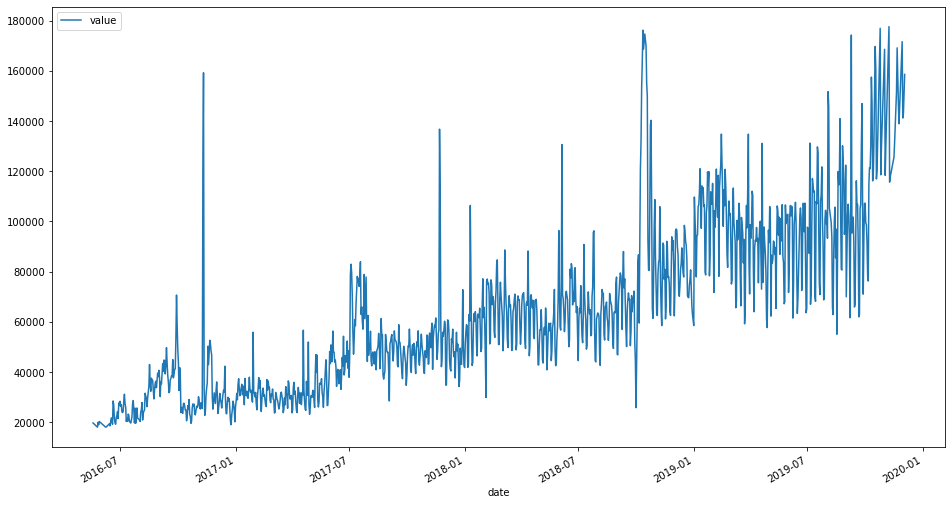

In [157]:
df_filtrado.plot(figsize=(16, 9))

### Copy and modify data for monthly bar plot

In [167]:
df_filtrado['month'] = df_filtrado.index.month
df_filtrado['year'] = df_filtrado.index.year
df_filtrado.head()

C:\Users\USUARIO\AppData\Local\Temp/ipykernel_18276/4017902605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['month'] = df_filtrado.index.month
C:\Users\USUARIO\AppData\Local\Temp/ipykernel_18276/4017902605.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['year'] = df_filtrado.index.year


,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016


In [168]:
df_bar = df_filtrado.groupby(["year", "month"])["value"].mean()
df_bar = df_bar.unstack()
df_bar.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


 ### Draw bar plot

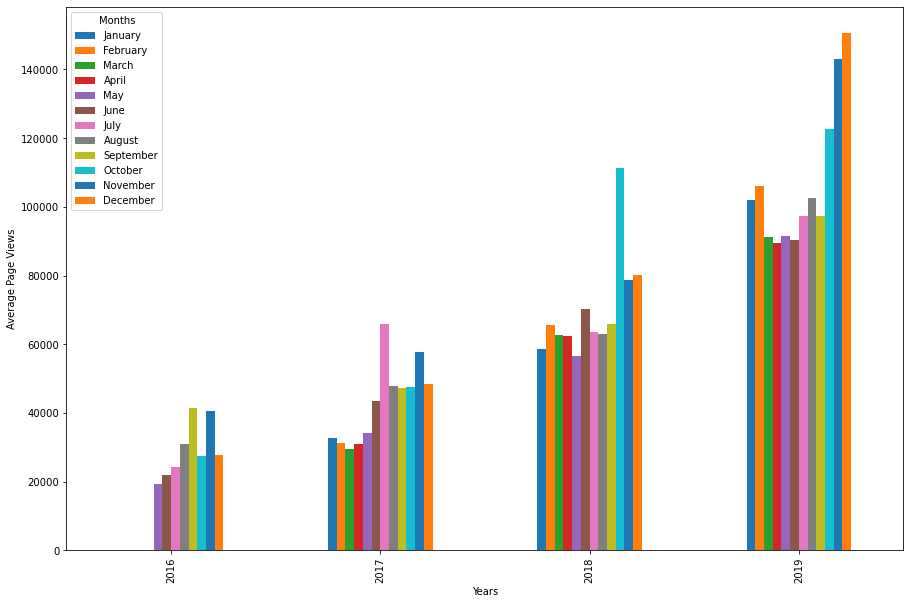

In [177]:
fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,10)).figure
plt.xlabel("Years", fontsize= 10)
plt.ylabel("Average Page Views", fontsize= 10)
plt.legend(fontsize = 10, title="Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.show()

 ### Draw box plots (using Seaborn)

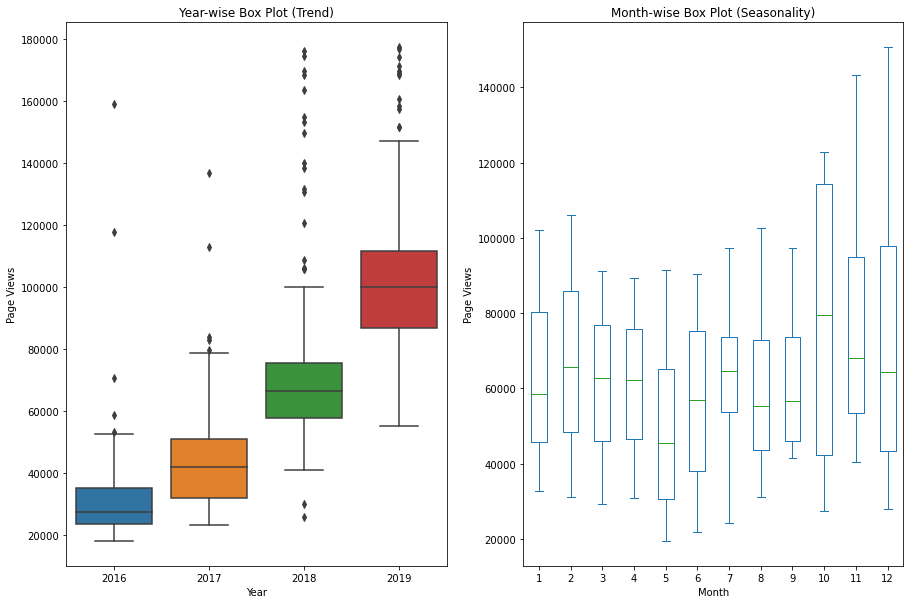

In [183]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)
ax1 = sns.boxplot(x=df_filtrado['year'],y=df_filtrado['value'],ax=ax1)
ax1.set_title("Year-wise Box Plot (Trend)") 
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax2 = df_bar.plot(kind ="box", legend = True, figsize = (15,10),ax=ax2)
ax2.set_title("Month-wise Box Plot (Seasonality)") 
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
plt.show()